# Avaliação de Clusters

## Formação dos Clusters

In [1]:
# Importando as bibliotecas e ferramentas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings

sns.set_theme(style='darkgrid', palette='pastel')
warnings.filterwarnings('ignore')

In [2]:
# Importando os dados
df = pd.read_csv('tamanho_pinguins.csv')
df.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Apagando linhas com valores faltantes
df = df.dropna()

In [4]:
# Apagando outlier
df = df[df.larg_bico_mm < 50]

In [5]:
# Separando os dados numéricos e as espécies dos penguins
# em dfs diferentes
x = df.iloc[:, 2:-1]
y = df.iloc[:,0]


In [6]:
x

,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [7]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: especie, Length: 333, dtype: object

In [8]:
# Fazendo a normalização dos dados
scaler = MinMaxScaler()
x_ = scaler.fit_transform(x)
x_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [9]:
# Salvando 2 variáveis em um df para facilitar a visualização

x2 = x_[:,[0,2]]
x2

array([[0.25454545, 0.15254237],
       [0.26909091, 0.23728814],
       [0.29818182, 0.38983051],
       [0.16727273, 0.3559322 ],
       [0.26181818, 0.30508475],
       [0.24727273, 0.15254237],
       [0.25818182, 0.38983051],
       [0.32727273, 0.16949153],
       [0.23636364, 0.3220339 ],
       [0.09090909, 0.44067797],
       [0.16363636, 0.22033898],
       [0.24      , 0.38983051],
       [0.37818182, 0.42372881],
       [0.08363636, 0.20338983],
       [0.50545455, 0.37288136],
       [0.20727273, 0.03389831],
       [0.20363636, 0.13559322],
       [0.13818182, 0.28813559],
       [0.22181818, 0.22033898],
       [0.24363636, 0.13559322],
       [0.11636364, 0.25423729],
       [0.30909091, 0.18644068],
       [0.30545455, 0.25423729],
       [0.21090909, 0.        ],
       [0.30545455, 0.13559322],
       [0.26909091, 0.10169492],
       [0.18545455, 0.10169492],
       [0.26909091, 0.27118644],
       [0.32      , 0.20338983],
       [0.15636364, 0.38983051],
       [0.

In [13]:
# Treinando o algoritmo KMeans com os dados
# usando k=2

kmeans = KMeans(n_clusters=2, random_state=3, n_init='auto').fit(x2)
labels = kmeans.labels_

In [14]:
# Salvando as informações do KMeans em um df
df_kmeans = pd.DataFrame(x2, columns=['comp_bico_mm', 'comp_asa_mm'])
df_kmeans['cluster'] = labels

<Axes: xlabel='comp_bico_mm', ylabel='comp_asa_mm'>

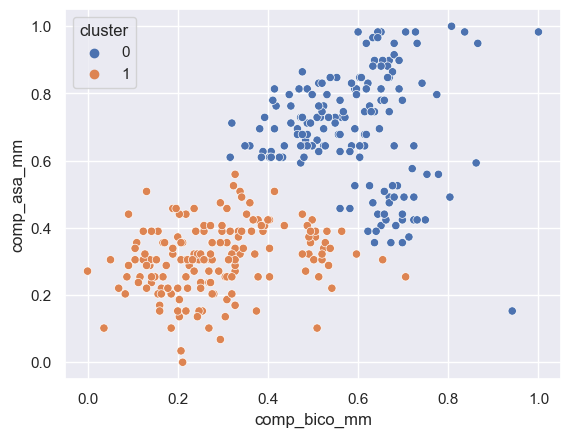

In [15]:
# Plotando os dados com os clusters do KMeans

sns.scatterplot(data = df_kmeans,
               x='comp_bico_mm',
               y='comp_asa_mm',
               hue='cluster',
               palette='deep')

In [18]:
# Fazendo o treinamento do DBSCAN com os dados
# e fazendo um df com os clusters
db= DBSCAN(eps=.1,min_samples=7).fit(x2)

df_db = pd.DataFrame(x2, columns=['comp_bico_mm', 'comp_asa_mm'])
df_db['cluster'] = db.labels_

<Axes: xlabel='comp_bico_mm', ylabel='comp_asa_mm'>

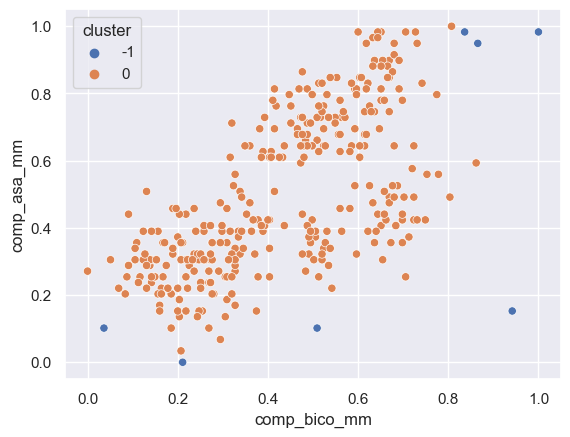

In [19]:
# Plotando os clusters feitos pelo DBSCAN
sns.scatterplot(data = df_db,
               x='comp_bico_mm',
               y='comp_asa_mm',
               hue='cluster',
               palette='deep')

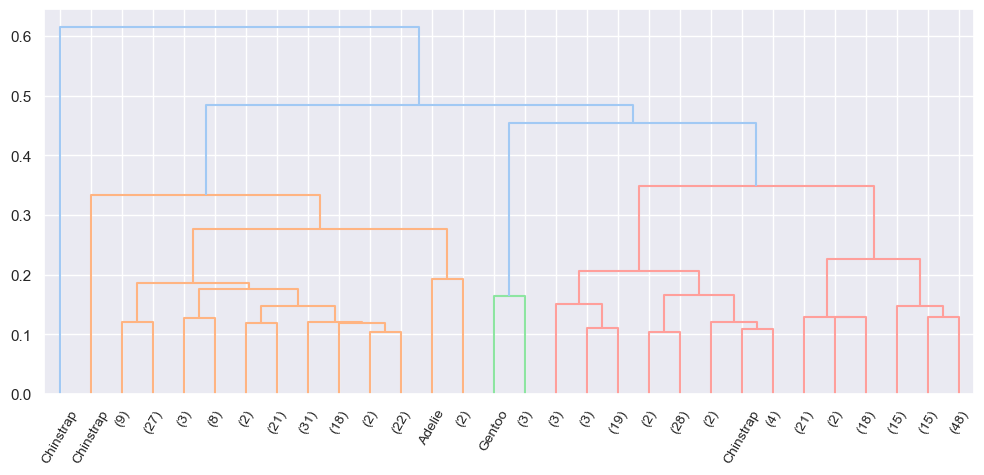

In [20]:
# Fazendo uma clusterização hierárquica

z = linkage(x2, method ='centroid')

plt.figure(figsize=(12,5))
dendrogram(z, truncate_mode='lastp',
          labels=list(df.especie),
          orientation='top',
          leaf_font_size=10,
          leaf_rotation=60,);

## Critérios relativos de avaliação

### Silhouette Score

In [21]:
# Importando as ferramentas para fazer uma análise do
# Silhouette Score

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics

In [27]:
# Verificando o valor de silhueta para diferentes
# valores de k no KMeans

for i in range(2,6):
    kmeans_model = KMeans(n_clusters=i, random_state=42).fit(x_)
    labels = kmeans_model.labels_
    print (f"k={i} - Silhueta = {metrics.silhouette_score(x_,labels,metric='euclidean'):3f}")

k=2 - Silhueta = 0.548734
k=3 - Silhueta = 0.433937
k=4 - Silhueta = 0.381713
k=5 - Silhueta = 0.366812


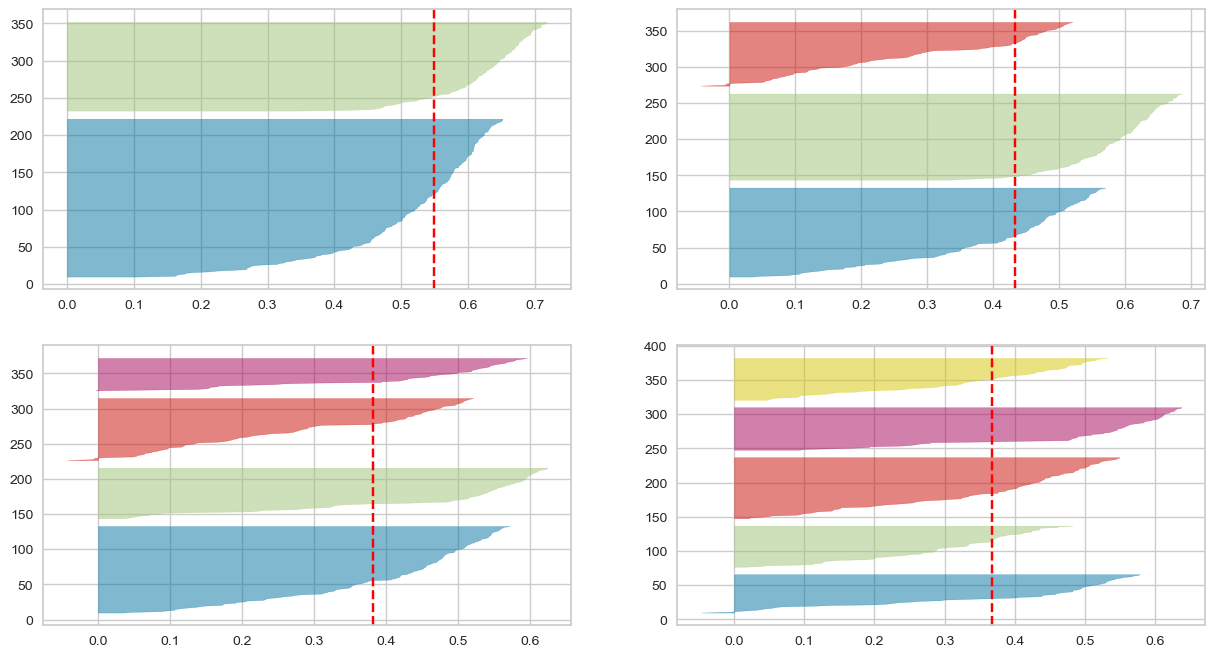

In [26]:
# Fazendo uma verificação gráfica do Silhouette Score

fig, ax = plt.subplots(2,2,figsize =(15,8))
for i in range (2,6):
    km = KMeans(n_clusters=i, init='k-means++',
               n_init = 10, max_iter = 100,
               random_state = 42)
    q, mod = divmod(i,2)
    
    visualizer = SilhouetteVisualizer(km,colors='yellowbrick',
                                     ax = ax[q-1][mod])
    visualizer.fit(x_)

In [36]:
# Fazendo a análise do Silhouette Score no DBSCAN para
# diferentes valores de epsilon.

list_eps = [0.02, 0.05, 0.07, 0.1]
for i in list_eps:
    db = DBSCAN(eps=i, min_samples=3).fit(x_)
    db_labels = db.labels_
    
    n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    n_noise_ = list(db_labels).count(-1)
    
    if n_clusters_ > 1 :
        silhueta = metrics.silhouette_score(x_, db_labels,metric='euclidean')
        print(f"eps={i}, cluster={n_clusters_}, silhoueta={silhueta:.3f}, ruido={n_noise_}")
    else:
        print(f"eps={i}, cluster=1, ruído={list(db_labels).count(-1)}")
    

eps=0.02, cluster=1, ruído=333
eps=0.05, cluster=5, silhoueta=-0.454, ruido=317
eps=0.07, cluster=23, silhoueta=-0.320, ruido=213
eps=0.1, cluster=3, silhoueta=0.289, ruido=76


## Critérios Internos de Avaliação

### Método do Cotovelo

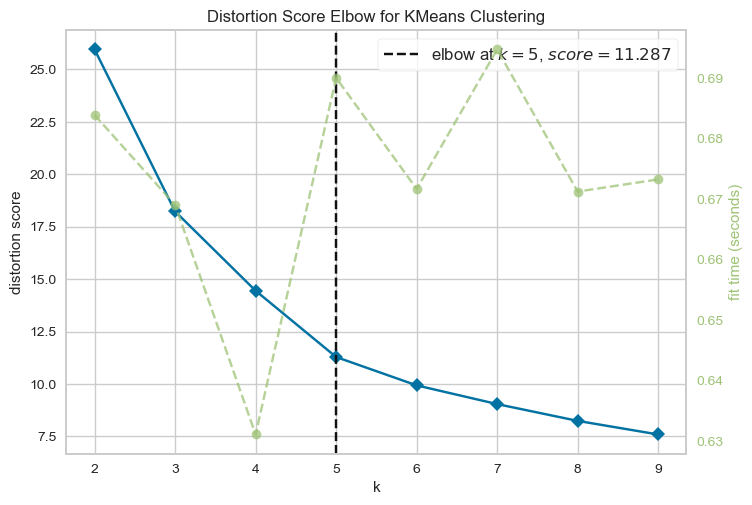

In [37]:
# Importando a ferrmenta e fazendo a visualização das
# distancias médias dos dados para os centros dos clusters
# no algoritmo KMeans, variando o k de 2 a 10
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion',
                             timings=True)
visualizer.fit(x_)
visualizer.show();

In [38]:
# Treinando o KMeans com k=5, e plotando com dados em 2
# dimensoes para facilitar a visualização

kmeans = KMeans(n_clusters=5, random_state=3,n_init='auto').fit(x_)
df_kmeans = pd.DataFrame(x2, columns=['comp_bico_mm', 'comp_asa_mm'])
df_kmeans['cluster'] = kmeans.labels_

<Axes: xlabel='comp_bico_mm', ylabel='comp_asa_mm'>

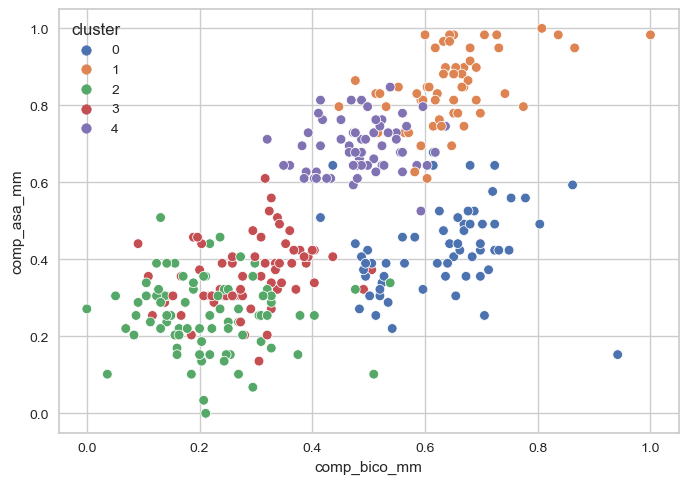

In [39]:
# Plotando os dados com os clusters do KMeans para k=5

sns.scatterplot(data = df_kmeans,
               x='comp_bico_mm',
               y='comp_asa_mm',
               hue='cluster',
               palette='deep')

## Critérios Externos de Avaliação

### Rand Index

In [42]:
# Fazendo calculo do Rand Index da base de dados
# para verificar o valor de k que melhor acerta
# a clusterização, quando comparado com as espécies especificadas
for i in range (2,8):
    kmeans_model = KMeans(n_clusters=i, random_state=42).fit(x_)
    labels = kmeans_model.labels_
    print(f"k={i} - rand index = {metrics.rand_score(labels, y):.3f}")

k=2 - rand index = 0.822
k=3 - rand index = 0.882
k=4 - rand index = 0.820
k=5 - rand index = 0.817
k=6 - rand index = 0.804
k=7 - rand index = 0.784


In [43]:
# Verificando o Rand Score do DBSCAN para diferentes
# valores de epsilon
list_eps = [0.02, 0.05, 0.07, 0.1, 1.2]
for i in list_eps:
    db = DBSCAN(eps=i, min_samples=3).fit(x_)
    db_labels = db.labels_
    
    n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    n_noise_ = list(db_labels).count(-1)
    rand_index = metrics.rand_score(db_labels, y)
    print(f"eps={i}, clusters={n_clusters_}, rand index={rand_index:.3f}, ruido={n_noise_}")

eps=0.02, clusters=0, rand index=0.359, ruido=333
eps=0.05, clusters=5, rand index=0.385, ruido=317
eps=0.07, clusters=23, rand index=0.548, ruido=213
eps=0.1, clusters=3, rand index=0.839, ruido=76
eps=1.2, clusters=1, rand index=0.359, ruido=0
